![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# Task 1: Introduction

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](images/1_1.png)

### Import TensorFlow

In [41]:
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 1.13.1


# Task 2: The Dataset
### Import MNIST

In [42]:
#import dataset, commonly used for training purposes

from tensorflow.keras.datasets import mnist

#returns training and test data 

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

### Shapes of Imported Arrays

In [4]:
print('xtrain shape: ', xtrain.shape)

print('ytrain shape: ', ytrain.shape)

print('xtest shape: ', xtest.shape)

print('ytest shape: ', ytest.shape)

#60,000 examples in xtrain, each is 28x28

xtrain shape:  (60000, 28, 28)
ytrain shape:  (60000,)
xtest shape:  (10000, 28, 28)
ytest shape:  (10000,)


### Plot an Image Example

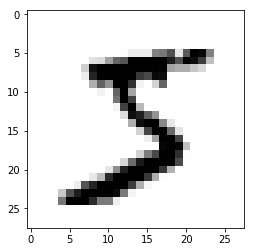

In [43]:
from matplotlib import pyplot as plt 

%matplotlib inline

plt.imshow(xtrain[0], cmap = 'binary') #cmap binary means black and white color
plt.show()

### Display Labels

In [11]:
ytrain[0]

5

In [12]:
print((set(ytrain)))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [44]:
from tensorflow.keras.utils import to_categorical

ytrainencoded = to_categorical(ytrain)
ytestencoded = to_categorical(ytest)

#validate the shapes
print('ytrainencoded shape: ', ytrainencoded.shape)
print('ytestencoded shape: ', ytestencoded.shape)

# Still have the same number of examples, but now they are 10 dim array.

ytrainencoded shape:  (60000, 10)
ytestencoded shape:  (10000, 10)


### Validated Shapes

### Display Encoded Labels

In [16]:
ytrainencoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Task 4: Neural Networks

### Linear Equations

![Single Neuron](images/1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](images/1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](images/1_4.png)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [45]:
import numpy as np

xtrainreshaped = np.reshape(xtrain,(60000, 784))
xtestreshaped = np.reshape(xtest, (10000,784))

print('xtrain reshaped shape', xtrainreshaped.shape)
print('xtest reshaped shape', xtestreshaped.shape)

## each example is now a 784 dimension image, each index representing a pixel.

xtrain reshaped shape (60000, 784)
xtest reshaped shape (10000, 784)


### Display Pixel Values

In [8]:
xtrain[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [14]:
#Calculate mean and std for the data set

xmean = np.mean(xtrainreshaped)
xstd = np.std(xtrainreshaped)

print(xmean)
print(xstd)

33.318421449829934
78.56748998339798


### Data Normalization

In [17]:
epsilon = 1e-10 

xtrainnorm = ((xtrainreshaped - xmean) / (xstd + epsilon)) 
#being subtracted from all values in entire training set
#adding epsilon ads stability to calculation ...? 

xtestnorm = ((xtestreshaped - xmean) / (xstd + epsilon)) #again using xmean and xstd values from xtrain
#this is standard practice. use the normalization values from one data set. 

### Display Normalized Pixel Values

In [18]:
print(xtrainnorm[0])

[-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0

# Task 6: Creating a Model
### Creating the Model

In [26]:
# two hidden layers with 128 nodes each, with 10 output nodes for the 10 classes.
#all layers are dense layers, which means all nodes from last layer are connected to a node in next layer.

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

#Use sequential, and pass a list of layers
model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

#understand the code 
#we are instantiating a sequential model using keras, tensorflow libaries.
#pass list of layers we want in our model, in the order we want them. 

### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

### Compiling the Model

In [31]:
#

model.compile(
    optimizer = 'sgd',
    loss='categorical_crossentropy',#minimize loss function
    metrics=['accuracy']
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Task 7: Training the Model

### Training the Model

In [33]:
# use only training set, save the test set for measuring the accuracy.

model.fit(xtrainnorm, ytrainencoded, epochs=3) #going through all the examples 3 times

Epoch 1/3
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3801 - acc: 0.8895
Epoch 2/3
60000/60000 [==============================] - 6s 108us/sample - loss: 0.1876 - acc: 0.9456
Epoch 3/3
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1429 - acc: 0.9583


### Evaluating the Model

In [34]:
# we want to know the model is not just relying on memorization
# to do that we will evaluate the model 

loss, accuracy = model.evaluate(xtestnorm, ytestencoded)

print('Test set accuracy:', accuracy*100)

10000/10000 [==============================] - 1s 71us/sample - loss: 0.1332 - acc: 0.9602
Test set accuracy: 96.02000117301941


# Task 8: Predictions

### Predictions on Test Set

In [38]:
preds = model.predict(xtestnorm)
print('shape of preds', preds.shape)

shape of preds (10000, 10)


### Plotting the Results

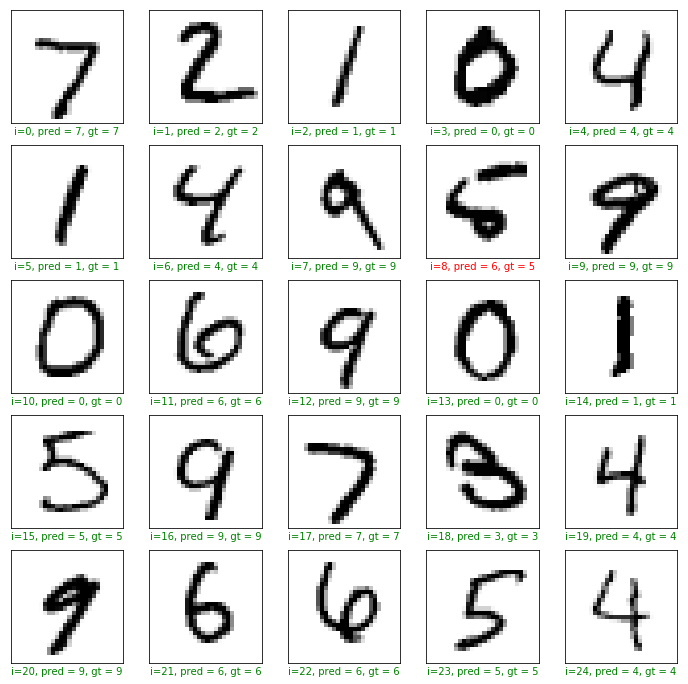

In [52]:
plt.figure(figsize=(12,12))

start_index = 0

for i in range(25): #print 25 examples at a time 
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i]) #bit of post processing on predictions
    gt = ytest[start_index+i] #groundtruth?
    
    col = 'g'
    if pred != gt: #if prediction is not equal to ground truth, change color
        col = 'r'
        
    plt.xlabel('i={}, pred = {}, gt = {}'.format(start_index+i, pred,gt),color = col)
    plt.imshow(xtest[start_index+i],cmap = 'binary' )

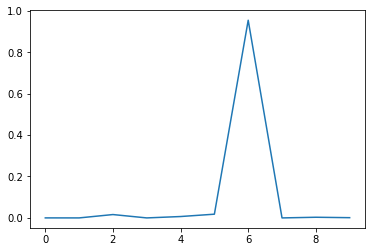

In [54]:
# take a look at the one we got wrong, index = 8 
plt.plot(preds[8])
plt.show()